Import Dependencies

In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib
import sklearn 
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

2023-02-20 12:11:59.319490: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Exploratory Data Analysis

In [2]:
data_path = os.path.join("Data", "reviews.csv")

In [3]:
data = pd.read_csv(data_path)

In [4]:
data.head()

,Time_submitted,Review,Rating,Total_thumbsup,Reply
0,2022-07-09 15:00:00,"Great music service, the audio is high quality...",5,2,NaN
1,2022-07-09 14:21:22,Please ignore previous negative rating. This a...,5,1,NaN
2,2022-07-09 13:27:32,"This pop-up ""Get the best Spotify experience o...",4,0,NaN
3,2022-07-09 13:26:45,Really buggy and terrible to use as of recently,1,1,NaN
4,2022-07-09 13:20:49,Dear Spotify why do I get songs that I didn't ...,1,1,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61594 entries, 0 to 61593
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Time_submitted  61594 non-null  object
 1   Review          61594 non-null  object
 2   Rating          61594 non-null  int64 
 3   Total_thumbsup  61594 non-null  int64 
 4   Reply           216 non-null    object
dtypes: int64(2), object(3)
memory usage: 2.3+ MB


In [6]:
data.describe()

,Rating,Total_thumbsup
count,61594.000000,61594.000000
mean,3.155989,7.649381
std,1.673285,89.323143
min,1.000000,0.000000
25%,1.000000,0.000000
50%,3.000000,0.000000
75%,5.000000,1.000000
max,5.000000,8195.000000


In [7]:
replies = data[~data["Reply"].isna()]
replies # Gives new dataframe with replies, so should be 216 rows.

,Time_submitted,Review,Rating,Total_thumbsup,Reply
73,2022-07-09 09:50:47,"Great song selection, amazing audio quality. H...",3,8,"Hey, thanks for the feedback! We'd love to hel..."
699,2022-07-08 01:51:27,Seems like the random stopping of music has be...,4,4,"Hey, thanks for the report. If you haven't tri..."
1151,2022-07-07 03:39:14,They would add their songs to MY PLAYLIST! I c...,1,1,"Hey, thanks for the feedback! You can always a..."
1277,2022-07-06 20:16:03,I paid last month for Premium Family & my wife...,5,0,Hi James! We’re sorry to hear that. We’d love ...
1668,2022-07-06 00:59:54,I really don't care about the random pauses in...,3,0,"Hi again. If you haven't tried Premium yet, we..."
...,...,...,...,...,...
61116,2022-01-09 13:40:37,Why can't you skip back without premium? Spoti...,4,3,Hey! Have you tried restarting your device or ...
61257,2022-01-07 01:44:14,"Ads are fine, if anything they're a necessity....",1,5,"Hey, thanks for the feedback. Suggested tracks..."
61374,2022-01-05 02:35:44,Considering stopping my subscription due to th...,1,0,Hey! We'd love to help get this fixed. If you ...
61397,2022-01-04 16:59:22,I am 100% sure this is the worst music app I e...,3,0,Hey! We're sorry to hear you feel that way abo...


In [8]:
palettes = ['#eee82c', '#91cb3e', '#53a548', '#4c934c', '#19381f']

Text(0.5, 1.0, 'Rating of Replied Reviews')

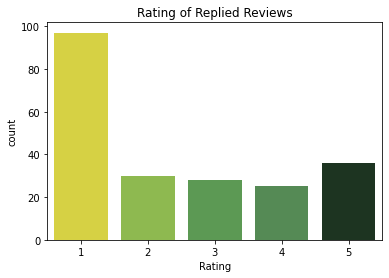

In [9]:
ax = sns.countplot(data=replies, x="Rating", palette=palettes)
ax.set_title('Rating of Replied Reviews')

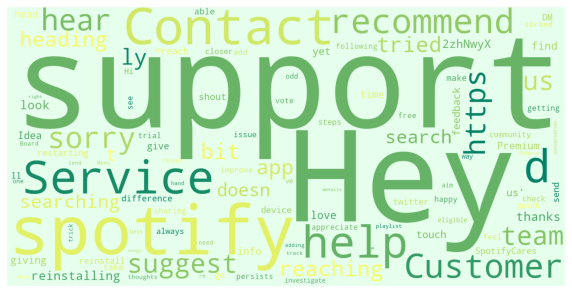

In [10]:
plt.figure(figsize=(10,10))
wc = WordCloud(max_words=1000, min_font_size=10, height=600, width=1200, collocations=False,
               background_color='#e6ffed', colormap='summer').generate(' '.join(replies['Reply']))

plt.axis('off')
plt.imshow(wc)

In [11]:
def top_words(text):
    word = pd.DataFrame(wc.process_text(''.join(text)).items()).sort_values(1, ascending=False)
    
    print('Top 5 words that appear most frequently:\n')
    for i in range(5):
        item = word.iloc[i]
#        print(item)
        print(item[0] + '\t--> ' + str(item[1]))

In [12]:
top_words(replies['Reply'])

Top 5 words that appear most frequently:

support	--> 204
Hey	--> 194
spotify	--> 166
Contact	--> 118
Service	--> 115


In [13]:
data["Time_submitted"] = pd.to_datetime(data["Time_submitted"])
data["Date"] = data["Time_submitted"].apply(lambda x: x.date())

reviews_per_day = data.groupby(data["Date"]).count()["Review"]
reviews_per_day = reviews_per_day.reset_index()
reviews_per_day["Month"] = reviews_per_day["Date"].apply(lambda x:x.month)

In [14]:
reviews_per_day.rename(columns={'Review':'Total Reviews'}, inplace=True)
reviews_per_day.head()

,Date,Total Reviews,Month
0,2022-01-01,46,1
1,2022-01-02,43,1
2,2022-01-03,66,1
3,2022-01-04,56,1
4,2022-01-05,64,1


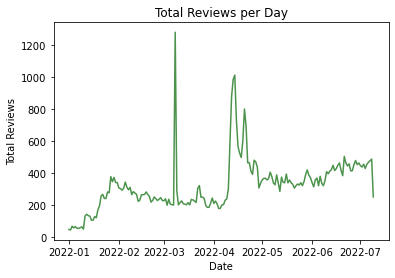

In [15]:
ax = sns.lineplot(data=reviews_per_day, x="Date", y="Total Reviews", color='#4c934c')
ax.set_title("Total Reviews per Day")
plt.show()

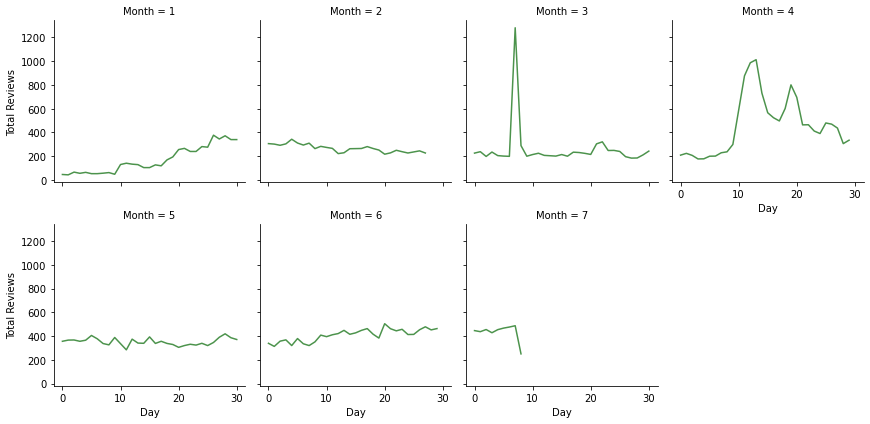

In [16]:
grid = sns.FacetGrid(data=reviews_per_day, col="Month", col_wrap=4)
grid.map(plt.plot, "Total Reviews", color='#4c934c')
grid.set_axis_labels(x_var="Day", y_var="Total Reviews")

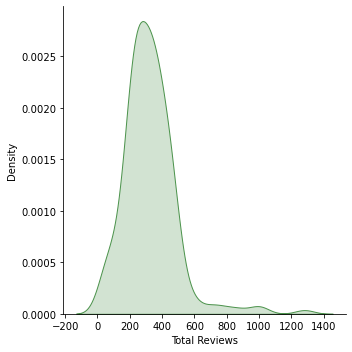

In [17]:
ax = sns.displot(data=reviews_per_day, x='Total Reviews', kind='kde', fill=True, color='#4c934c')
plt.show()

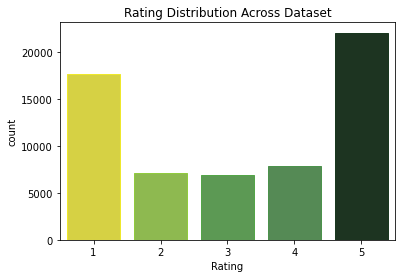

In [18]:
ax = sns.countplot(data=data, x="Rating", palette=palettes, edgecolor=palettes)
ax.set_title('Rating Distribution Across Dataset')
plt.show()

In [19]:
def rating(score):
    if score > 3:
        return 'Good'
    elif score == 3:
        return 'Neutral'
    else:
        return 'Bad'

In [20]:
data['Rating'] = data['Rating'].apply(rating)

In [21]:
data.select_dtypes(include=["object"])

,Review,Rating,Reply,Date
0,"Great music service, the audio is high quality...",Good,NaN,2022-07-09
1,Please ignore previous negative rating. This a...,Good,NaN,2022-07-09
2,"This pop-up ""Get the best Spotify experience o...",Good,NaN,2022-07-09
3,Really buggy and terrible to use as of recently,Bad,NaN,2022-07-09
4,Dear Spotify why do I get songs that I didn't ...,Bad,NaN,2022-07-09
...,...,...,...,...
61589,Even though it was communicated that lyrics fe...,Bad,NaN,2022-01-01
61590,"Use to be sooo good back when I had it, and wh...",Bad,NaN,2022-01-01
61591,This app would be good if not for it taking ov...,Bad,NaN,2022-01-01
61592,The app is good hard to navigate and won't jus...,Bad,NaN,2022-01-01


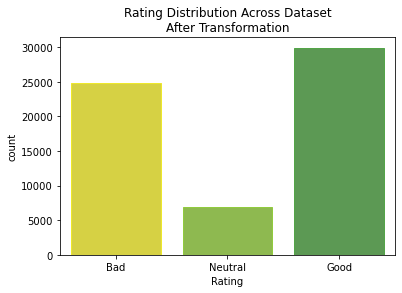

In [24]:
ax = sns.countplot(data=data, x='Rating', palette=palettes, edgecolor=palettes, order = ["Bad", "Neutral", "Good"])
ax.set_title('Rating Distribution Across Dataset\nAfter Transformation')
plt.show()

In [29]:
max_thumbs = data["Total_thumbsup"].max()
print(data[data["Total_thumbsup"] == max_thumbs].iloc[0]["Review"])

The app is very good. I got to explore many new songs. However, I took out a star because of a few reasons. First:- It sometimes lags and won't show the music dialog box on your screen or in the app and for this I have to restart it. Second:- I cannot delete my history on phone. Third:- I cannot shuffle playlists or Albums. They have to play on the fixed sequence. Fourth:- I cannot see which song is going to play next if it's a radio and Fifth:- Sometimes the song stops and doesn't start radio


Text(8, 0.2, 'Mean: 7.65')

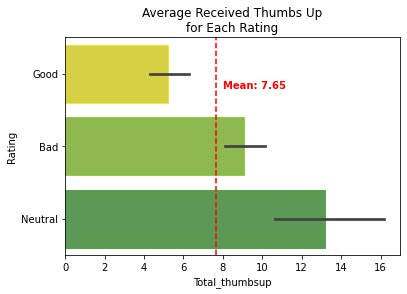

In [36]:
mean_thumbs = data["Total_thumbsup"].mean()

ax = sns.barplot(data=data, y="Rating", x="Total_thumbsup", orient="h", palette=palettes, edgecolor=palettes)
ax.set_title('Average Received Thumbs Up\nfor Each Rating')
plt.axvline(mean_thumbs, color="red", ls="--")
plt.text(x=8, y=0.2, s='Mean: ' + str(round(mean_thumbs, 2)), color='red', weight='bold')

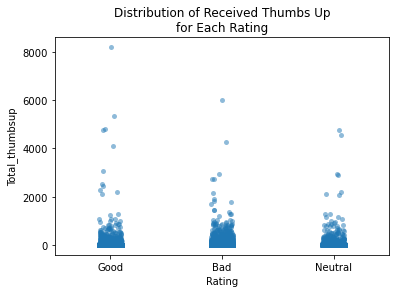

In [44]:
ax = sns.stripplot(data=data, x="Rating", y="Total_thumbsup", alpha=0.5)
ax.set_title('Distribution of Received Thumbs Up\nfor Each Rating')
plt.show()

In [49]:
def review(adjective=str):
    dataframe = data[data["Rating"] == adjective]["Review"]
    
    plt.figure(figsize=(10,10))
    wc = WordCloud(max_words=1000, min_font_size=10, height=600, width=1200, collocations=False,
               background_color='#e6ffed', colormap='summer').generate(' '.join(dataframe))
    
    plt.axis('off')
    plt.imshow(wc)
    
    top_words(dataframe)

Top 5 words that appear most frequently:

app	--> 15681
music	--> 14881
song	--> 10608
Spotify	--> 8621
love	--> 6909


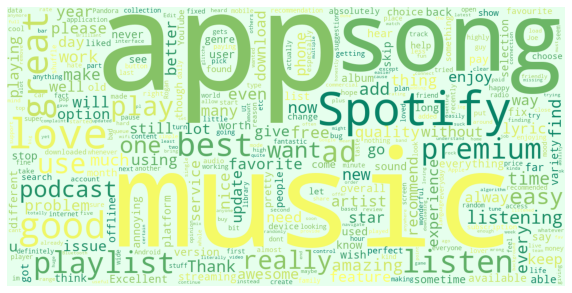

In [50]:
review("Good")

Top 5 words that appear most frequently:

song	--> 4993
app	--> 4125
music	--> 2322
play	--> 2032
Spotify	--> 1837


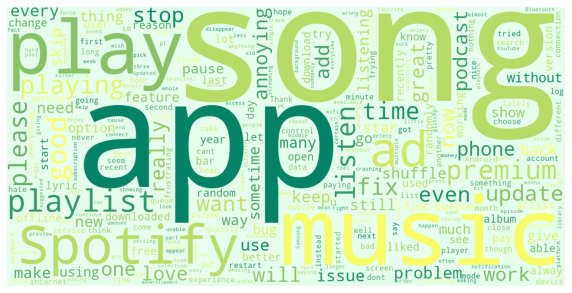

In [51]:
review("Neutral")

Top 5 words that appear most frequently:

song	--> 16766
app	--> 16445
play	--> 8867
music	--> 7745
Spotify	--> 7381


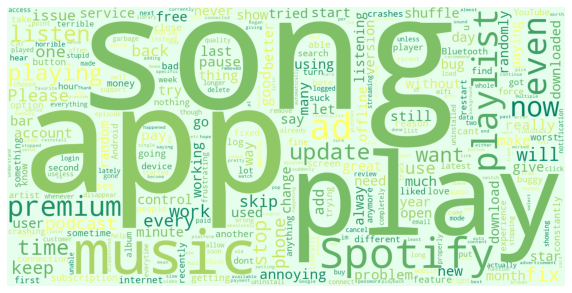

In [52]:
review("Bad")

In [53]:
# All have similar top words.

In [55]:
data.columns

Index(['Time_submitted', 'Review', 'Rating', 'Total_thumbsup', 'Reply',
       'Date'],
      dtype='object')

In [66]:
data["Length"] = data['Review'].str.len()

In [67]:
data.head()

,Time_submitted,Review,Rating,Total_thumbsup,Reply,Date,Length
0,2022-07-09 15:00:00,"Great music service, the audio is high quality...",Good,2,NaN,2022-07-09,112
1,2022-07-09 14:21:22,Please ignore previous negative rating. This a...,Good,1,NaN,2022-07-09,86
2,2022-07-09 13:27:32,"This pop-up ""Get the best Spotify experience o...",Good,0,NaN,2022-07-09,106
3,2022-07-09 13:26:45,Really buggy and terrible to use as of recently,Bad,1,NaN,2022-07-09,47
4,2022-07-09 13:20:49,Dear Spotify why do I get songs that I didn't ...,Bad,1,NaN,2022-07-09,100


In [68]:
data_final = data[["Review", "Rating", "Length"]]

Text Processing

In [70]:
length = data_final["Length"].sum()
length

10059745

In [103]:
import nltk
nltk.download('wordnet') 
nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import string

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/liranpod/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/liranpod/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [93]:
print("Original:")
print(data["Review"][10])

Original:
Love Spotify, and usually this app is the best, but as others have stated; the control buttons disappear and podcasts stop for no reason, which is only fixed by deleting and reinstalling the app. First world problems for sure, but highly annoying nonetheless, especially when paying for prime.


In [94]:
sentence = []
for word in data["Review"][10].split():
    stemmer = SnowballStemmer("english")
    sentence.append(stemmer.stem(word))
print("Stemming:")
print(" ".join(sentence))

Stemming:
love spotify, and usual this app is the best, but as other have stated; the control button disappear and podcast stop for no reason, which is onli fix by delet and reinstal the app. first world problem for sure, but high annoy nonetheless, especi when pay for prime.


In [95]:
sentence = []
for word in data["Review"][10].split():
    lemmatizer = WordNetLemmatizer()
    sentence.append(lemmatizer.lemmatize(word, "v"))
print("Lemmatizing:")
print(" ".join(sentence))

Lemmatizing:
Love Spotify, and usually this app be the best, but as others have stated; the control button disappear and podcast stop for no reason, which be only fix by delete and reinstall the app. First world problems for sure, but highly annoy nonetheless, especially when pay for prime.


In [96]:
# We will use the lemmatizer.

In [105]:
def cleaning(text):
    # Remove punctuation and uppercase
    clean_text = text.translate(str.maketrans('', '', string.punctuation)).lower()
    
    # Remove stopwords
    clean_text = [word for word in clean_text.split() if word not in stopwords.words("english")]
    
    # Lemmatize words
    sentence = []
    for word in clean_text:
        lemmatizer = WordNetLemmatizer()
        sentence.append(lemmatizer.lemmatize(word, "v"))
        
    return ' '.join(sentence)

In [106]:
data["Review"] = data["Review"].apply(cleaning)

In [109]:
data['Length'] = data['Review'].apply(len)
new_length = data['Length'].sum()

print('Total words before cleaning: {}'.format(length))
print('Total words after cleaning: {}'.format(new_length))

Total words before cleaning: 10059745
Total words after cleaning: 6210516


In [110]:
data.head()

,Time_submitted,Review,Rating,Total_thumbsup,Reply,Date,Length
0,2022-07-09 15:00:00,great music service audio high quality app eas...,Good,2,NaN,2022-07-09,79
1,2022-07-09 14:21:22,please ignore previous negative rat app super ...,Good,1,NaN,2022-07-09,66
2,2022-07-09 13:27:32,popup get best spotify experience android 12 a...,Good,0,NaN,2022-07-09,69
3,2022-07-09 13:26:45,really buggy terrible use recently,Bad,1,NaN,2022-07-09,34
4,2022-07-09 13:20:49,dear spotify get songs didnt put playlist shuf...,Bad,1,NaN,2022-07-09,54


In [119]:
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelBinarizer

In [112]:
X_train, X_test, y_train, y_test = train_test_split(data["Review"], data["Rating"], test_size=0.2)

LSTM Model

In [121]:
tokenizer = Tokenizer(num_words=50000, oov_token="<OOV>")

tokenizer.fit_on_texts(X_train)
total_word = len(tokenizer.word_index)
print('Total distinct words: {}'.format(total_word))

train_seq = tokenizer.texts_to_sequences(X_train)
train_padded = pad_sequences(train_seq)

test_seq = tokenizer.texts_to_sequences(X_test)
test_padded = pad_sequences(test_seq)

lb = LabelBinarizer()
train_labels = lb.fit_transform(y_train)
test_labels = lb.transform(y_test)

Total distinct words: 25386


In [151]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, Dropout, Dense, LSTM

from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping

In [205]:
def build_model_lstm():
    model = Sequential([
        Embedding(total_word+1, 32),
        Bidirectional(LSTM(32, activation="tanh")),
        Dropout(0.5),
        Dense(128, activation="relu"),
        Dropout(0.5),
        Dense(256, activation="relu"),
        Dropout(0.5),
        Dense(128, activation="relu"),
        Dense(3, activation="softmax")
    ])
    return model

In [206]:
strategy = tf.distribute.get_strategy()

In [207]:
with strategy.scope():
    model_lstm = build_model_lstm()

    METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
    
    model_lstm.compile(
        optimizer=tf.optimizers.Adam(learning_rate=0.0001),
        loss='categorical_crossentropy',
        metrics=METRICS
    )

In [208]:
model_lstm.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_13 (Embedding)    (None, None, 32)          812384    
                                                                 
 bidirectional_13 (Bidirecti  (None, 64)               16640     
 onal)                                                           
                                                                 
 dropout_28 (Dropout)        (None, 64)                0         
                                                                 
 dense_30 (Dense)            (None, 128)               8320      
                                                                 
 dropout_29 (Dropout)        (None, 128)               0         
                                                                 
 dense_31 (Dense)            (None, 256)               33024     
                                                     

In [209]:
logdir = "Logs"

In [210]:
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

In [211]:
checkpoint_cb = ModelCheckpoint("model_lstm.h5", save_best_only=True)
early_stopping_cb = EarlyStopping(patience=10, restore_best_weights=True)

In [212]:
hist = model_lstm.fit(train_padded, train_labels, epochs=25,
                      validation_data=(test_padded, test_labels), 
                      callbacks=[tensorboard_callback, checkpoint_cb, early_stopping_cb])

Epoch 1/25
1540/1540 [==============================] - 122s 77ms/step - loss: 0.7806 - accuracy: 0.6579 - precision: 0.7426 - recall: 0.5167 - val_loss: 0.6174 - val_accuracy: 0.7736 - val_precision: 0.7879 - val_recall: 0.7510
Epoch 2/25
1540/1540 [==============================] - 157s 102ms/step - loss: 0.5988 - accuracy: 0.7838 - precision: 0.8032 - recall: 0.7588 - val_loss: 0.5958 - val_accuracy: 0.7802 - val_precision: 0.7963 - val_recall: 0.7603
Epoch 3/25
1540/1540 [==============================] - 162s 105ms/step - loss: 0.5667 - accuracy: 0.7963 - precision: 0.8158 - recall: 0.7736 - val_loss: 0.5888 - val_accuracy: 0.7843 - val_precision: 0.7975 - val_recall: 0.7694
Epoch 4/25
1540/1540 [==============================] - 166s 108ms/step - loss: 0.5428 - accuracy: 0.8029 - precision: 0.8252 - recall: 0.7792 - val_loss: 0.5816 - val_accuracy: 0.7860 - val_precision: 0.8028 - val_recall: 0.7609
Epoch 5/25
1540/1540 [==============================] - 170s 110ms/step - loss: 0

In [217]:
def plot(metric=str):
    plt.figure(figsize=(8,6))
    
    plt.plot(hist.history[metric], color="teal", label=metric)
    plt.plot(hist.history["val_" + metric], color="orange", label="val " + metric)
    plt.title(metric)
    plt.legend(loc="upper left")
    
    plt.show()

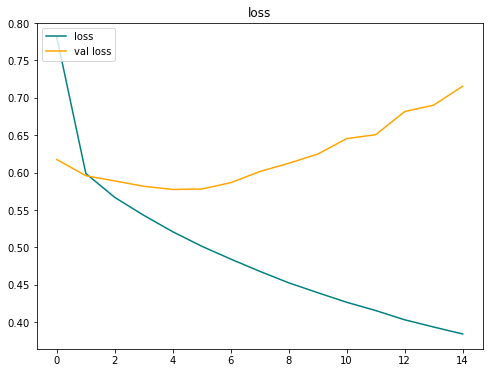

In [218]:
plot("loss")

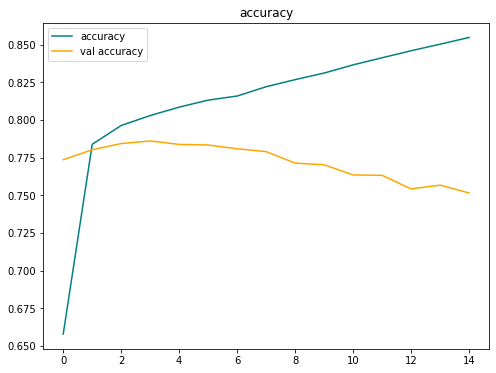

In [219]:
plot("accuracy")

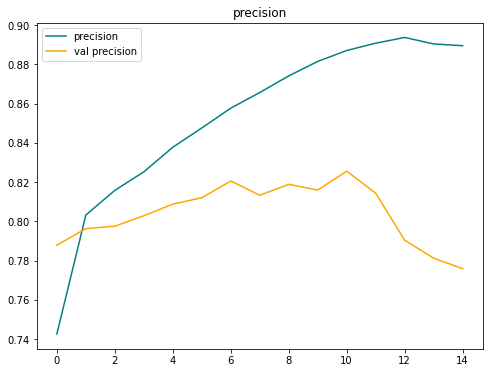

In [220]:
plot("precision")

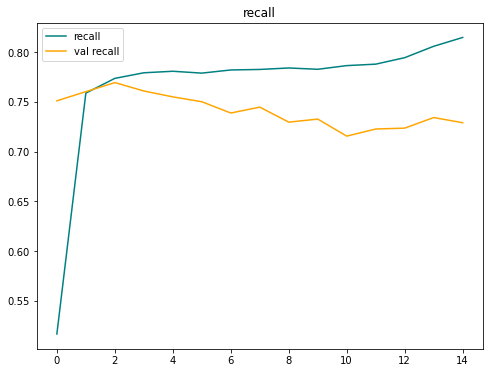

In [221]:
plot("recall")

In [222]:
def lstm_prediction(text):
    clean_text = cleaning(text)
    seq = tokenizer.texts_to_sequences([clean_text])
    padded = pad_sequences(seq)
    
    pred = model_lstm.predict(padded)
    result = lb.inverse_transform(pred)[0]
    
    return result

In [225]:
text1 = "There is a major bug in the app. I can't play my playlist since the last 2 days"

print('LSTM\t: ', lstm_prediction(text1))

1/1 [==============================] - 0s 22ms/step
LSTM	:  Bad


In [227]:
text2 = "Love this app! the interface is clean and pleasing to the eye"

print('LSTM\t: ', lstm_prediction(text2))

1/1 [==============================] - 1s 508ms/step
LSTM	:  Good
